In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.utils import shuffle
import tensorflow_hub as hub
from tensorflow.keras import Sequential,layers,activations
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
daisy=glob('daisy/*.jpg')[0:200]
dandelion=glob('dandelion/*.jpg')[0:200]
rose=glob('rose/*jpg')[0:200]
sunflower=glob('sunflower/*jpg')[0:200]
tulip=glob('tulip/*jpg')[0:200]

In [3]:
classes={0:'Daisy',1:'Dandelion',2:'Rose',3:'Sunflower',4:'Tulip'}

In [4]:
images=[]
labels=[]

for i in daisy:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)

for i in dandelion:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)

for i in rose:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)

for i in sunflower:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)

for i in tulip:
    img=plt.imread(i)
    images.append(img)
    labels.append(4)


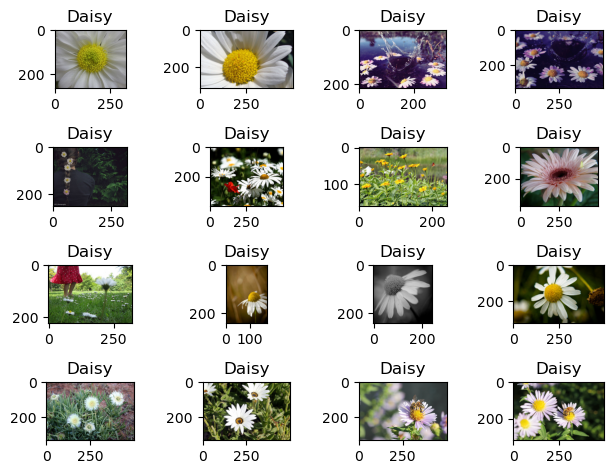

In [5]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

In [6]:
images,labels=shuffle(images,labels)

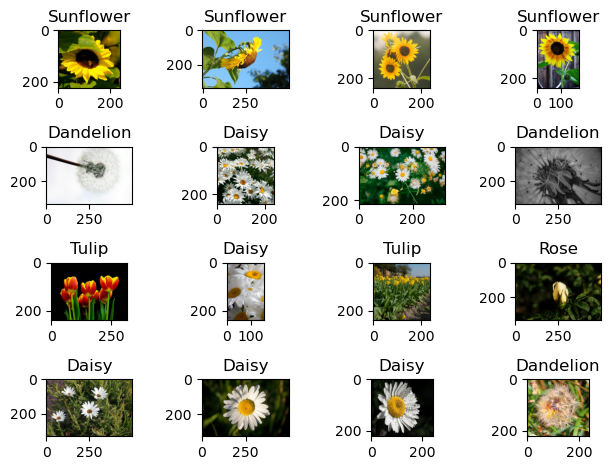

In [7]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

In [8]:
x=[]

for i in images:
    x.append(resize(i,(224,224,3)))

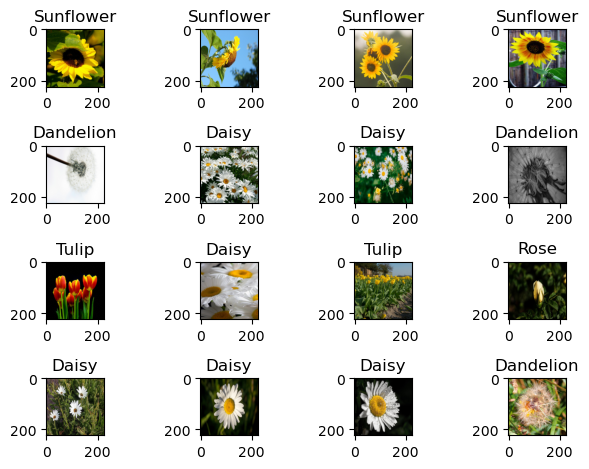

In [9]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

In [10]:
x=np.array(x)
y=np.array(labels)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [11]:
feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [12]:
hub.load(feature_extractor_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x25d4ef525e0>

In [13]:
model=Sequential([
    hub.KerasLayer(feature_extractor_model,input_shape=(224,224,3),trainable=False),
    
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.1),
    
    layers.Dense(14,activation='relu'),
    
    layers.Dense(5,activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 14)                910       
                                                                 
 dense_2 (Dense)             (None, 5)                 75        
                                                                 
Total params: 2,340,953
Trainable params: 82,969
Non-trainable params: 2,257,984
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs=3,validation_split=0.05)

Epoch 1/3
23/23 [==============================] - 59s 1s/step - loss: 0.9923 - accuracy: 0.6138 - val_loss: 0.5252 - val_accuracy: 0.8158
Epoch 2/3
23/23 [==============================] - 28s 1s/step - loss: 0.4620 - accuracy: 0.8483 - val_loss: 0.3859 - val_accuracy: 0.8684
Epoch 3/3
23/23 [==============================] - 28s 1s/step - loss: 0.2885 - accuracy: 0.9031 - val_loss: 0.3519 - val_accuracy: 0.8421


In [22]:
y_pred=model.predict(x_test)

8/8 [==============================] - 12s 1s/step


In [23]:
predicted=[np.argmax(i) for i in y_pred]

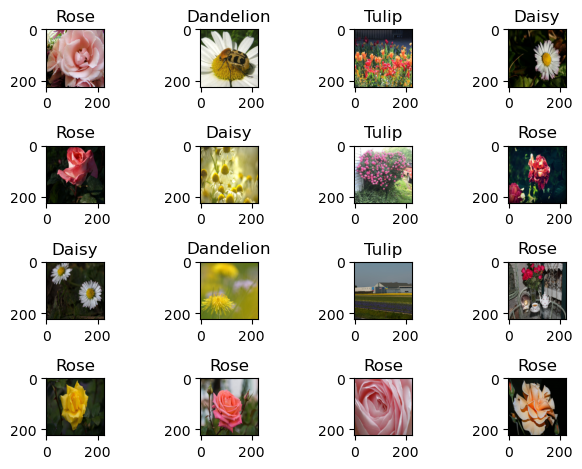

In [25]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i])
    plt.title(classes[predicted[i]])
plt.tight_layout()

In [26]:
accuracy_score(y_test,predicted)

0.84

<AxesSubplot:>

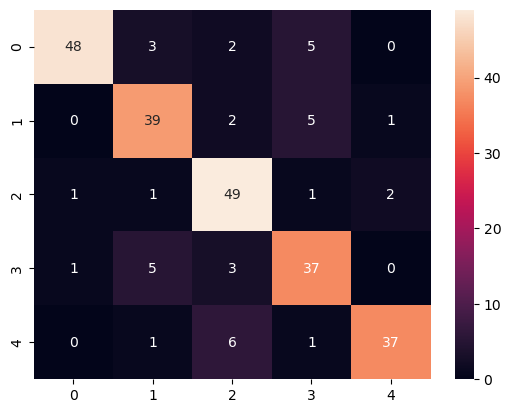

In [27]:
sns.heatmap(confusion_matrix(y_test,predicted),annot=True,fmt='d')

In [28]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        58
           1       0.80      0.83      0.81        47
           2       0.79      0.91      0.84        54
           3       0.76      0.80      0.78        46
           4       0.93      0.82      0.87        45

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250

